<a href="https://colab.research.google.com/github/theclosedbook/GAN/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
#Print Tf Version
print(tf.__version__)

2.15.0


In [3]:
## Loading and preprocessing the dataset
(X_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#Shape of X_train
X_train.shape

(60000, 28, 28)

In [5]:
#Shape of y_train
y_train.shape

(60000,)

49479
4


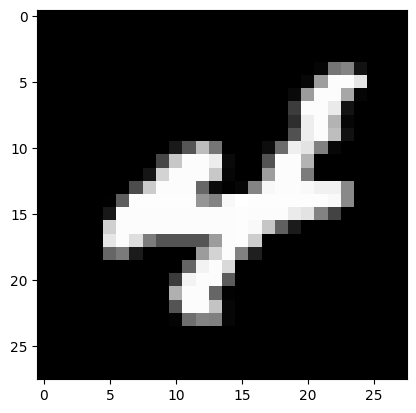

In [6]:
# To Visualize X_train and y_train
i = np.random.randint(0,60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

In [7]:
# Reshaping X_train
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [8]:
#Shape Of the resized X_train
X_train.shape

(60000, 28, 28, 1)

In [9]:
#Min and Max Value (Normalization Needed)
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [10]:
X_train = (X_train - 127.5) / 127.5

In [11]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [12]:
buffer_size = 60000
batch_size = 256

In [14]:
#Coneverting from np to tensors
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [16]:
#X_train info after converting into tensor
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

##Building Generator

In [21]:
# 100 -> 12544
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network


In [22]:
# Summary of the generator
generator = build_generator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_2 (Bat  (None, 12544)             50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_3 (Bat  (None, 7, 7, 128)        

In [23]:
# Input of the generator
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_2_input')>

In [32]:
# Random Noise
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.26806748e+00, -6.23921573e-01, -1.69399452e+00,
         7.10899651e-01, -4.72992621e-02,  1.34208441e+00,
        -6.36471033e-01,  6.09167755e-01, -1.60278901e-01,
        -9.72228587e-01,  1.17434525e+00, -2.04625443e-01,
         3.23318720e-01, -2.11418280e-03,  1.55473745e+00,
        -4.98131126e-01,  8.72822255e-02,  7.46871293e-01,
        -1.52455151e-01,  1.38896316e-01, -1.45982206e+00,
         1.17208374e+00, -1.77521989e-01,  2.89081049e+00,
         1.17888257e-01,  1.74606407e+00,  4.80727226e-01,
        -4.36758943e-04, -6.76079035e-01, -7.57776737e-01,
        -5.90269506e-01,  1.30309010e+00,  7.35580146e-01,
         1.10875392e+00, -6.27873302e-01,  6.04777932e-01,
        -9.21123862e-01,  3.99308801e-02,  1.18704247e+00,
        -6.50775075e-01,  7.97593296e-01,  2.32334390e-01,
        -5.79422891e-01, -2.16909692e-01,  7.40007997e-01,
        -1.97415721e+00, -5.42605579e-01,  1.03748262e+00,
      

In [33]:
generated_image = generator(noise,training = False)

In [34]:
generated_image.shape

TensorShape([1, 28, 28, 1])

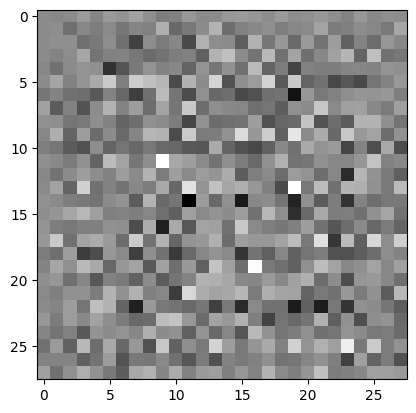

In [35]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')